In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
import tensorflow as tf

%matplotlib inline

/Users/miyoshi/tensorflow1.7/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from model import Model
from data_manager import DataManager
from hd_cells import HDCells
from place_cells import PlaceCells

def load_checkpoints(sess):
    saver = tf.train.Saver(max_to_keep=2)
    save_dir = "./saved"
    checkpoint_dir = save_dir + "/checkpoints"
    
    checkpoint = tf.train.get_checkpoint_state(checkpoint_dir)
    if checkpoint and checkpoint.model_checkpoint_path:
        saver.restore(sess, checkpoint.model_checkpoint_path)
                
batch_size = 1
sequence_length = 100

np.random.seed(1)
    
data_manager = DataManager()

place_cells = PlaceCells()
hd_cells = HDCells()

data_manager.prepare(place_cells, hd_cells)

model = Model(place_cell_size=place_cells.cell_size,
                          hd_cell_size=hd_cells.cell_size,
                          sequence_length=sequence_length)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

# Load checkpoints
load_checkpoints(sess)


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.

INFO:tensorflow:Restoring parameters from ./saved/checkpoints/checkpoint-299999


(-4.5, 4.5)

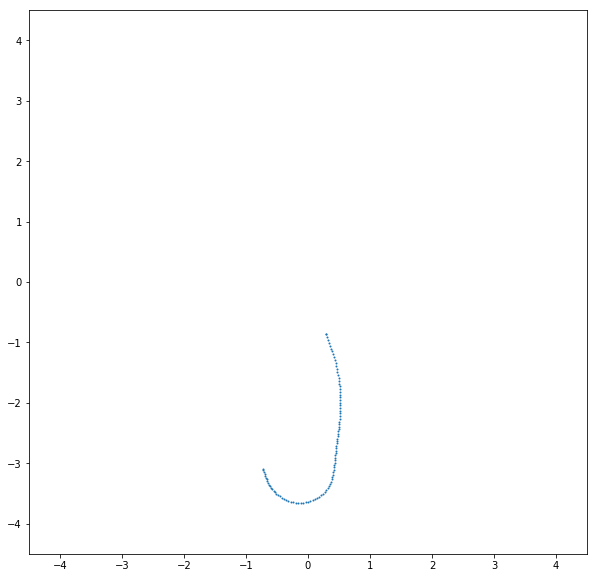

In [3]:
ep_length = 400
sim_steps = 50000

save_data = pickle.load(open("data/data.p", "rb"))
input_x = save_data["x"] # (49999, 7)
input_y = save_data["y"] # (49999, 2)
x = input_y[:100, 0]
z = input_y[:100, 1]

plt.figure(figsize=(10, 10))
plt.scatter(input_y[:100, 0], input_y[:100, 1], s=1)
plt.ylim(-4.5, 4.5)
plt.xlim(-4.5, 4.5)

In [4]:
# TODO: now using training data
out = data_manager.get_confirm_batch(batch_size, sequence_length, 0)
inputs_batch, place_init_batch, hd_init_batch, place_pos_batch = out

In [1]:
place_output_result = sess.run(
            model.place_outputs_result,
            feed_dict = {
                model.inputs : inputs_batch,
                model.place_init : place_init_batch,
                model.hd_init : hd_init_batch,
                model.keep_prob : 1.0
            })
# (100, 256)

NameError: name 'sess' is not defined

(-4.5, 4.5)

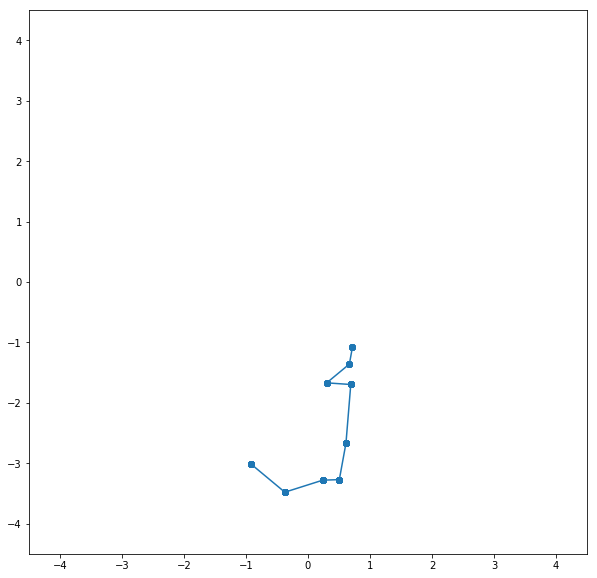

In [6]:
out_x = []
out_z = []

for c in place_output_result:
    # c=(256,)
    cell_pos = place_cells.get_nearest_cell_pos(c)
    out_x.append(cell_pos[0])
    out_z.append(cell_pos[1])
    
plt.figure(figsize=(10, 10))
plt.plot(out_x, out_z, "o-")
plt.ylim(-4.5, 4.5)
plt.xlim(-4.5, 4.5)